In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

In [3]:
df = pd.read_pickle('dataset/purprd_cust.pkl')
prod_list = pd.read_pickle('dataset/기준고객list.pkl')
df

,제휴사,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,구매월,중분류명,소분류명,대분류명,성별,거주지역,연령대
0,A,2757986,15148,10,20140920,20,1000,9,일용잡화,위생세제,가구/인테리어,F,경기 김포시,50대
1,A,2757986,15148,10,20140920,20,4100,9,가공식품,일반가공식품,가공식품,F,경기 김포시,50대
2,A,2757987,400,10,20140920,12,5000,9,농산물,채소,신선식품,F,경기 김포시,60세이상
3,A,2757987,400,10,20140920,12,10200,9,젓갈/반찬,벌크김치,가공식품,F,경기 김포시,60세이상
4,A,2757988,2043,10,20140920,13,3950,9,일용잡화,위생세제,가구/인테리어,F,경기 김포시,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,D,253839,15835,40,20151026,13,3000,22,음료,일반차음료,가공식품,M,경기 김포시,30대
28593026,D,253839,15835,40,20151026,13,1300,22,음료,커피음료,가공식품,M,경기 김포시,30대
28593027,D,253840,2070,40,20151026,16,59700,22,헤어케어,샴푸,일상용품,M,울산 동구,50대
28593028,D,253841,15835,40,20151026,23,2000,22,과자,하드캔디,가공식품,M,경기 김포시,30대


In [4]:
# 인덱스 고객번호로 변환, 

test_df = df.copy()
df = test_df.set_index('고객번호').loc[prod_list]

In [10]:
# 데이터 연,월 변환, 인덱스 리셋. 

def year(x):
    x = str(x)
    return x[:4]

def month(x):
    x = str(x)
    return x[4:6]

df['year'] = df['구매일자'].apply(year)
df['month'] = df['구매일자'].apply(month)

df = df.reset_index()

In [13]:
df

,고객번호,제휴사,영수증번호,점포코드,구매일자,구매시간,구매금액,구매월,중분류명,소분류명,대분류명,성별,거주지역,연령대,year,month
0,15148,A,2757986,10,20140920,20,1000,9,일용잡화,위생세제,가구/인테리어,F,경기 김포시,50대,2014,09
1,15148,A,2757986,10,20140920,20,4100,9,가공식품,일반가공식품,가공식품,F,경기 김포시,50대,2014,09
2,15148,A,2425862,10,20140726,19,10000,7,차/커피,디저트류,가공식품,F,경기 김포시,50대,2014,07
3,15148,A,1151596,10,20140103,18,10000,1,차/커피,디저트류,가공식품,F,경기 김포시,50대,2014,01
4,15148,A,1151603,10,20140103,13,51000,1,가공식품,식당가 중식,가공식품,F,경기 김포시,50대,2014,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28445978,14153,C,925569,58,20150120,16,10000,13,잡곡,현미,신선식품,F,전라남도 영광,50대,2015,01
28445979,14153,C,925569,58,20150120,16,4990,13,계란류,일반계란,신선식품,F,전라남도 영광,50대,2015,01
28445980,14153,C,925579,58,20150121,16,4900,13,양채류,양배추,신선식품,F,전라남도 영광,50대,2015,01
28445981,14153,C,925579,58,20150121,16,2300,13,우유,일반우유,가공식품,F,전라남도 영광,50대,2015,01


In [15]:
df['month'] = df['month'].astype('int64')

df_1 = df[(df['year']=='2014') & (df['month']<=6)] # 14_1
df_2 = df[(df['year']=='2014') & (df['month']>6)] # 14_2
df_3 = df[(df['year']=='2015') & (df['month']<=6)] # 14_3
df_4 = df[(df['year']=='2015') & (df['month']>6)] # 14_4

test1 = df_1.groupby('고객번호')[['구매금액']].sum()
test2 = df_2.groupby('고객번호')[['구매금액']].sum()
test3 = df_3.groupby('고객번호')[['구매금액']].sum()
test4 = df_4.groupby('고객번호')[['구매금액']].sum()

A = pd.merge(test1,test2, on ='고객번호', how ='outer')
B = pd.merge(A, test3, on = '고객번호', how='outer')
total = pd.merge(B, test4, on = '고객번호', how='outer')

total

,구매금액_x,구매금액_y,구매금액_x,구매금액_y
고객번호,,,,
1,19925355,34116312,17898365,13102518
2,24323230,21922100,27791610,25843820
3,851215,1042554,592280,679118
4,5042106,4257510,3656937,3737257
5,5460150,2225730,2934930,2616260
...,...,...,...,...
19356,170160,1536090,2104968,2434587
19357,91950,3281346,3044944,2246675
19359,43190,1286327,837240,1092380


In [22]:
df_1_F = df_1[(df_1['성별']=='F')]
df_1_M = df_1[(df_1['성별']=='M')]
df_2_F = df_2[(df_2['성별']=='F')]
df_2_M = df_2[(df_2['성별']=='M')]
df_3_F = df_3[(df_3['성별']=='F')]
df_3_M = df_3[(df_3['성별']=='M')]
df_4_F = df_4[(df_4['성별']=='F')]
df_4_M = df_4[(df_4['성별']=='M')]

In [25]:
df_1_F['구매금액'].sum()

126349553895

# #######################################################
# #######################################################
# 월별 구매금액 변화 추이 (고객별)
# #######################################################
# #######################################################

In [26]:
pv_1 = pd.pivot_table(data= df_1, columns='month', index='고객번호',values='구매금액',aggfunc='sum')
pv_2 = pd.pivot_table(data= df_2, columns='month', index='고객번호',values='구매금액',aggfunc='sum')
pv_3 = pd.pivot_table(data= df_3, columns='month', index='고객번호',values='구매금액',aggfunc='sum')
pv_4 = pd.pivot_table(data= df_4, columns='month', index='고객번호',values='구매금액',aggfunc='sum')

In [27]:
pv_1.fillna(0,inplace=True)
pv_2.fillna(0,inplace=True)
pv_3.fillna(0,inplace=True)
pv_4.fillna(0,inplace=True)

In [28]:
# 반기별 구매금액 총 합 ( 고객별 )

pv_1['sum'] = pv_1[1] + pv_1[2] + pv_1[3] + pv_1[4] + pv_1[5] + pv_1[6]
pv_2['sum'] = pv_2[7] + pv_2[8] + pv_2[9] + pv_2[10] + pv_2[11] + pv_2[12]
pv_3['sum'] = pv_3[1] + pv_3[2] + pv_3[3] + pv_3[4] + pv_3[5] + pv_3[6]
pv_4['sum'] = pv_4[7] + pv_4[8] + pv_4[9] + pv_4[10] + pv_4[11] + pv_4[12]

In [29]:
A = pd.merge(pv_1[['sum']],pv_2[['sum']], on ='고객번호', how ='outer')
B = pd.merge(A, pv_3[['sum']], on = '고객번호', how='outer')
total = pd.merge(B, pv_4[['sum']], on = '고객번호', how='outer')

total.fillna(0, inplace=True)
total.columns = ['14_1','14_2','15_1','15_2']

total['d1'] = total['14_2'] - total['14_1']
total['d2'] = total['15_1'] - total['14_2']
total['d3'] = total['15_2'] - total['15_1']

total['d1_p'] = (total['14_2'] - total['14_1']) / total['14_1']
total['d2_p'] = (total['15_1'] - total['14_2']) / total['14_2']
total['d3_p'] = (total['15_2'] - total['15_1']) / total['15_1']

In [30]:
total

,14_1,14_2,15_1,15_2,d1,d2,d3,d1_p,d2_p,d3_p
고객번호,,,,,,,,,,
1,19925355.0,34116312.0,17898365.0,13102518.0,14190957.0,-16217947.0,-4795847.0,0.712206,-0.475372,-0.267949
2,24323230.0,21922100.0,27791610.0,25843820.0,-2401130.0,5869510.0,-1947790.0,-0.098718,0.267744,-0.070086
3,851215.0,1042554.0,592280.0,679118.0,191339.0,-450274.0,86838.0,0.224783,-0.431895,0.146616
4,5042106.0,4257510.0,3656937.0,3737257.0,-784596.0,-600573.0,80320.0,-0.155609,-0.141062,0.021964
5,5460150.0,2225730.0,2934930.0,2616260.0,-3234420.0,709200.0,-318670.0,-0.592368,0.318637,-0.108578
...,...,...,...,...,...,...,...,...,...,...
19356,170160.0,1536090.0,2104968.0,2434587.0,1365930.0,568878.0,329619.0,8.027327,0.370342,0.156591
19357,91950.0,3281346.0,3044944.0,2246675.0,3189396.0,-236402.0,-798269.0,34.686199,-0.072044,-0.262162
19359,43190.0,1286327.0,837240.0,1092380.0,1243137.0,-449087.0,255140.0,28.782982,-0.349124,0.304739


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

h_list = ['14_1','14_2','15_1','15_2']

for i in h_list:
    total[i] = scaler.fit_transform(total[[i]])

In [37]:
# 매출변화확인 기준시점 - 이전시점

total['d1'] = total['14_2'] - total['14_1']
total['d2'] = total['15_1'] - total['14_2']
total['d3'] = total['15_2'] - total['15_1']

total['d1_p'] = (total['14_2'] - total['14_1']) / total['14_1']*100
total['d2_p'] = (total['15_1'] - total['14_2']) / total['14_2']*100
total['d3_p'] = (total['15_2'] - total['15_1']) / total['15_1']*100

total

,14_1,14_2,15_1,15_2,d1,d2,d3,d1_p,d2_p,d3_p
고객번호,,,,,,,,,,
1,0.014341,0.025508,0.017109,0.010494,0.011167,-0.008399,-0.006615,77.864845,-32.926031,-38.665670
2,0.017507,0.016390,0.026574,0.020704,-0.001117,0.010184,-0.005870,-6.381615,62.133554,-22.089643
3,0.000609,0.000778,0.000553,0.000539,0.000169,-0.000225,-0.000014,27.712815,-28.944148,-2.578992
4,0.003626,0.003182,0.003485,0.002989,-0.000444,0.000303,-0.000496,-12.255258,9.516402,-14.221284
5,0.003927,0.001663,0.002794,0.002091,-0.002265,0.001131,-0.000703,-57.662429,68.037584,-25.165745
...,...,...,...,...,...,...,...,...,...,...
19356,0.000119,0.001147,0.002000,0.001945,0.001028,0.000853,-0.000055,864.709466,74.357355,-2.735298
19357,0.000063,0.002452,0.002899,0.001795,0.002389,0.000447,-0.001105,3817.132210,18.238841,-38.097361
19359,0.000027,0.000960,0.000787,0.000870,0.000933,-0.000173,0.000083,3392.822610,-18.027799,10.486999


In [38]:
print(len(total[(total['d1_p']<0)])/len(total))
print(len(total[(total['d2_p']<0)])/len(total))
print(len(total[(total['d3_p']<0)])/len(total))

print(len(total[(total['d1']<0)])/len(total))
print(len(total[(total['d2']<0)])/len(total))
print(len(total[(total['d3']<0)])/len(total))

0.3798270893371758
0.24474718365208278
0.6874508776526067
0.3798270893371758
0.24474718365208278
0.6874508776526067


In [61]:
# 단계별 (구매감소비율)

d1_loss_g1 = len(total[(total['d1_p']<0) & (total['d1_p'] >= -10)])/len(total) # d1 에서 0미만 ~ 10퍼 감소한 비율
d1_loss_g2 = len(total[(total['d1_p']<-10) & (total['d1_p'] >= -30)])/len(total) #d1 에서 10~ 30퍼 감소한 비율
d1_loss_g3 = len(total[(total['d1_p']<-30)])/len(total) #d1 에서 30퍼 이하로 감소한 비율

d2_loss_g1 = len(total[(total['d2_p']<0) & (total['d2_p'] >= -10)])/len(total)
d2_loss_g2 = len(total[(total['d2_p']<-10) & (total['d2_p'] >= -30)])/len(total)
d2_loss_g3 = len(total[(total['d2_p']<-30)])/len(total)

d3_loss_g1 = len(total[(total['d3_p']<0) & (total['d3_p'] >= -10)])/len(total)
d3_loss_g2 = len(total[(total['d3_p']<-10) & (total['d3_p'] >= -30)])/len(total)
d3_loss_g3 = len(total[(total['d3_p']<-30)])/len(total)

In [133]:
t1 = pd.Series([d1_loss_g1, d1_loss_g2, d1_loss_g3])
t2 = pd.Series([d2_loss_g1, d2_loss_g2, d2_loss_g3])
t3 = pd.Series([d3_loss_g1, d3_loss_g2, d3_loss_g3])

td = pd.DataFrame([t1,t2,t3],index=['14_1 => 14_2', '14_2 => 15_1', '15_1 => 15_2'])

In [136]:
td

,0,1,2
14_1 => 14_2,0.106366,0.164003,0.109458
14_2 => 15_1,0.069741,0.095677,0.079329
15_1 => 15_2,0.108095,0.276238,0.303118


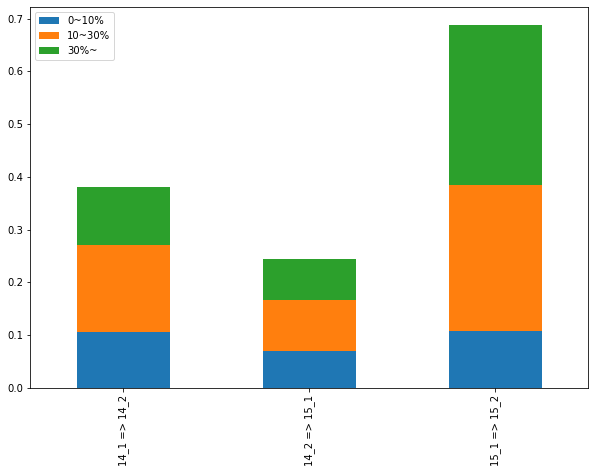

In [140]:
td.plot.bar(stacked=True, figsize=(10,7))
plt.legend(['0~10%','10~30%','30%~'])